In [133]:
import pandas as pd

# Data Gathering

In [134]:
project=pd.read_csv('Project.projectexperiences.csv')
certificate=pd.read_csv('Project.certificates.csv') 
users=pd.read_csv('Project.userdetails.csv')
skills=pd.read_csv('Project.skilldetails.csv')
skills

,_id,Empid,skillName,Proficiency,__v
0,660bc7802e1f83fa6a7b27ac,Emp_8,Requirements Analysis,Advance,NaN
1,660bc7802e1f83fa6a7b2790,Emp_1,Support,Expert,NaN
2,660bc7802e1f83fa6a7b279d,Emp_4,Data Analysis,Intermidiate,NaN
3,660bc7802e1f83fa6a7b278e,Emp_0,Vue.js,Advance,NaN
4,660bc7802e1f83fa6a7b2794,Emp_2,Communication,Beginner,NaN
...,...,...,...,...,...
1994,660bc7802e1f83fa6a7b2f43,Emp_491,User Research,Intermidiate,NaN
1995,660bc7802e1f83fa6a7b2f53,Emp_495,Microservices,Advance,NaN
1996,660c30597ecede045f8aaee6,Emp_0,Angular,Expert,0.0
1997,660ed9afd077065a8bba296e,Emp_0,Kotlin,Advanced,0.0


In [135]:
certificate.iloc[1]

Unnamed: 0                                                1
Empid                                                Emp_71
certificateName                                         CSS
issuingOrganization                           Johnson Group
issueDate                                        1977-10-18
ExpireDate                                       2024-05-02
credentialID           5a5d0257-c736-4e2f-822f-9701e6fc064c
Status                                             Approved
Name: 1, dtype: object

In [136]:
certificate_status=pd.read_csv('certificate_smms.csv')
certificate_status

,certificateName,Num_of_emp,Approved
0,.NET,23,15
1,Accessibility,33,20
2,Agile Methodologies,35,15
3,Agile Product Management,32,19
4,Angular,29,13
...,...,...,...
67,UI/UX Design,28,16
68,User Research,36,18
69,User Stories,29,15
70,Vue.js,31,13


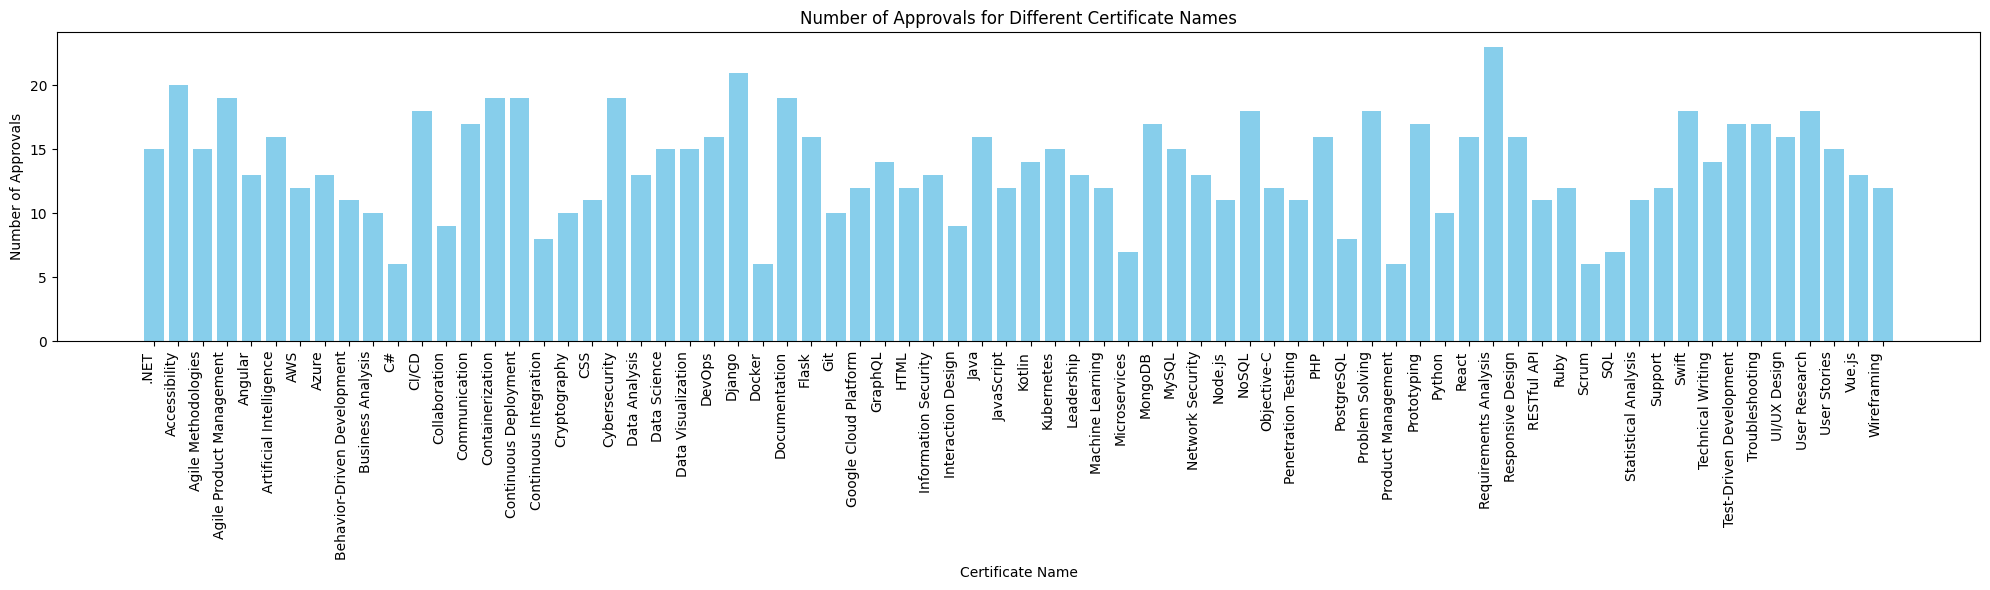

In [137]:

import matplotlib.pyplot as plt

# Data
certificate_names = certificate_status['certificateName']
num_of_emp = certificate_status['Num_of_emp']
approved = certificate_status['Approved']

# Plot
plt.figure(figsize=(20, 6))
plt.bar(certificate_names, approved, color='skyblue')
plt.xlabel('Certificate Name')
plt.ylabel('Number of Approvals')
plt.title('Number of Approvals for Different Certificate Names')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [138]:
skills=pd.DataFrame(skills)
skills

,_id,Empid,skillName,Proficiency,__v
0,660bc7802e1f83fa6a7b27ac,Emp_8,Requirements Analysis,Advance,NaN
1,660bc7802e1f83fa6a7b2790,Emp_1,Support,Expert,NaN
2,660bc7802e1f83fa6a7b279d,Emp_4,Data Analysis,Intermidiate,NaN
3,660bc7802e1f83fa6a7b278e,Emp_0,Vue.js,Advance,NaN
4,660bc7802e1f83fa6a7b2794,Emp_2,Communication,Beginner,NaN
...,...,...,...,...,...
1994,660bc7802e1f83fa6a7b2f43,Emp_491,User Research,Intermidiate,NaN
1995,660bc7802e1f83fa6a7b2f53,Emp_495,Microservices,Advance,NaN
1996,660c30597ecede045f8aaee6,Emp_0,Angular,Expert,0.0
1997,660ed9afd077065a8bba296e,Emp_0,Kotlin,Advanced,0.0


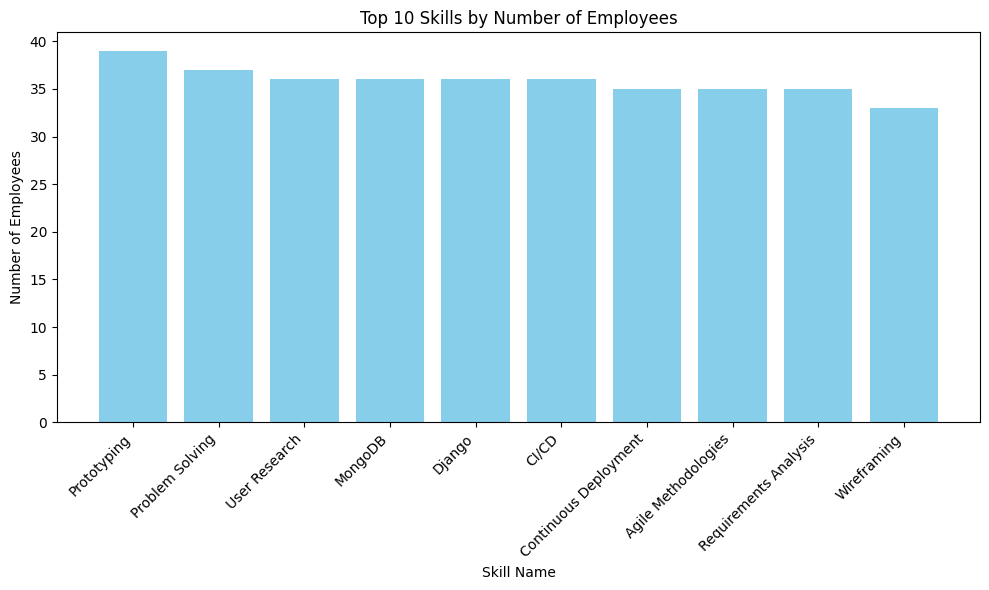

In [139]:
skill_count = skills.groupby('skillName').size().reset_index(name='EmployeeCount')

top_10_skills = skill_count.sort_values(by='EmployeeCount', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_skills['skillName'], top_10_skills['EmployeeCount'], color='skyblue')
plt.xlabel('Skill Name')
plt.ylabel('Number of Employees')
plt.title('Top 10 Skills by Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# skill data cleaning

In [140]:
##skill datda
import pandas as pd

# Assuming skills is your DataFrame containing skills data
skills = pd.DataFrame(skills)

def get_skills_for_employee(emp_id, skills_df):
    try:
        employee_skills = skills_df[skills_df['Empid'] == emp_id]
        return employee_skills
    except Exception as e:
        print('Error fetching skills:', e)
        return None

skills_data = []  # Initialize skills_data as an empty list
for employee_id in skills['Empid'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_skills = get_skills_for_employee(employee_id, skills)
    if employee_skills is not None and not employee_skills.empty:
        skill_list = [{'skillName': row['skillName'], 'proficiency': row['Proficiency']} for index, row in employee_skills.iterrows()]
        skills_data.append({'Empid': employee_id, 'skills': skill_list})
    else:
        print('No skills found for employee ID:', employee_id)

#print('Skills data:', skills_data)


In [141]:
skills_data=pd.DataFrame(skills_data)

In [142]:
skills_data

,Empid,skills
0,Emp_8,"[{'skillName': 'Requirements Analysis', 'profi..."
1,Emp_1,"[{'skillName': 'Support', 'proficiency': 'Expe..."
2,Emp_4,"[{'skillName': 'Data Analysis', 'proficiency':..."
3,Emp_0,"[{'skillName': 'Vue.js', 'proficiency': 'Advan..."
4,Emp_2,"[{'skillName': 'Communication', 'proficiency':..."
...,...,...
494,Emp_422,"[{'skillName': 'Flask', 'proficiency': 'Expert..."
495,Emp_491,"[{'skillName': 'Agile Methodologies', 'profici..."
496,Emp_497,"[{'skillName': 'User Stories', 'proficiency': ..."
497,Emp_401,"[{'skillName': 'Flask', 'proficiency': 'Interm..."


# project Data cleaning

In [143]:
#project data 
import ast  # Import the ast module to parse the string representation of the list

project = pd.DataFrame(project)

def get_project_for_employee(emp_id, project_df):
    try:
        employee_project = project_df[project_df['Empid'] == emp_id]
        return employee_project
    except Exception as e:
        print('Error fetching project:', e)
        return None

projects_data = []  # Initialize projects_data as an empty list
for employee_id in project['Empid'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_project = get_project_for_employee(employee_id, project)
    if employee_project is not None and not employee_project.empty:
        project_list = [{'projectType': row['projectType'], 'Tech_stack': ast.literal_eval(row['Tech_stack'])} for index, row in employee_project.iterrows()]
        projects_data.append({'Empid': employee_id, 'projects': project_list})
    else:
        print('No projects found for employee ID:', employee_id)

#print('Projects data:', projects_data)


In [144]:
project_data=pd.DataFrame(projects_data)

In [145]:
project_data

,Empid,projects
0,Emp_0,"[{'projectType': 'Data Analyzer', 'Tech_stack'..."
1,Emp_1,"[{'projectType': 'Virtual Assistant', 'Tech_st..."
2,Emp_2,[{'projectType': 'Healthcare Management System...
3,Emp_3,[{'projectType': 'Inventory Management System'...
4,Emp_4,[{'projectType': 'Human Resource Management Sy...
...,...,...
495,Emp_495,[{'projectType': 'Healthcare Management System...
496,Emp_496,"[{'projectType': 'Help Desk Software', 'Tech_s..."
497,Emp_497,"[{'projectType': 'Help Desk Software', 'Tech_s..."
498,Emp_498,"[{'projectType': 'Sales Forecasting Software',..."


# certificate data cleaning

In [146]:
import pandas as pd

certificate = pd.DataFrame(certificate)

def get_certificates_for_employee(emp_id, certificate_df):
    try:
        employee_certificate = certificate_df[certificate_df['Empid'] == emp_id]
        return employee_certificate
    except Exception as e:
        print('Error fetching certificate:', e)
        return None

certificate_data = []  # Initialize skills_data as an empty list
for employee_id in certificate['Empid'].unique():  # Iterate over unique employee IDs in the DataFrame
    employee_certificate = get_skills_for_employee(employee_id, certificate)
    if employee_certificate is not None and not employee_certificate.empty:
        certificate_list = [{'certificateName': row['certificateName'], 'Status': row['Status']} for index, row in employee_certificate.iterrows()]
        certificate_data.append({'Empid': employee_id, 'certificate': certificate_list})
    else:
        print('No certificate found for employee ID:', employee_id)




In [147]:
certificate_data=pd.DataFrame(certificate_data)

In [148]:
certificate_data

,Empid,certificate
0,Emp_180,"[{'certificateName': 'Requirements Analysis', ..."
1,Emp_71,"[{'certificateName': 'CSS', 'Status': 'Approve..."
2,Emp_302,"[{'certificateName': 'Wireframing', 'Status': ..."
3,Emp_207,"[{'certificateName': 'Network Security', 'Stat..."
4,Emp_329,"[{'certificateName': 'HTML', 'Status': 'Approv..."
...,...,...
494,Emp_394,"[{'certificateName': 'Accessibility', 'Status'..."
495,Emp_105,"[{'certificateName': 'MySQL', 'Status': 'Appro..."
496,Emp_209,"[{'certificateName': 'Cybersecurity', 'Status'..."
497,Emp_335,"[{'certificateName': 'Flask', 'Status': 'Appro..."


In [149]:
import pandas as pd

# Convert 'users' DataFrame to a list of dictionaries
users_data = []
for index, row in users.iterrows():
    # Check for NaN values and convert them to empty strings
    first_name = row['FirstName'] if pd.notna(row['FirstName']) else ''
    last_name = row['LastName'] if pd.notna(row['LastName']) else ''
    
    data = {
        'Empid': row['Empid'],
        'Name': first_name + ' ' + last_name
    }
    users_data.append(data)

# Display the result
#print(users_data)



In [150]:
users_data=pd.DataFrame(users_data)

In [151]:
users_data

,Empid,Name
0,Emp_17,Vivie Eisak
1,Emp_28,Kata Creasy
2,Emp_23,Britteny Lannen
3,Emp_4,Gwendolen Whorall
4,Emp_27,Robert Danzey
...,...,...
500,Emp_501,suraj pokriyal
501,Emp_504,suraj pokriyal
502,Emp_5044353,suraj pokriyal
503,Emp_5044353sdfsdf,suraj pokriyal


#  Data Integration

In [152]:
merged_data = pd.merge(users_data, skills_data ,on='Empid', how='inner')


In [153]:
merged_data= pd.merge(merged_data, project_data ,on='Empid', how='inner')

In [154]:
merged_data= pd.merge(certificate_data, merged_data ,on='Empid', how='inner')

In [155]:
merged_data

,Empid,certificate,Name,skills,projects
0,Emp_180,"[{'certificateName': 'Requirements Analysis', ...",Cassy Berkeley,"[{'skillName': 'Troubleshooting', 'proficiency...",[{'projectType': 'Inventory Management System'...
1,Emp_71,"[{'certificateName': 'CSS', 'Status': 'Approve...",Isa Munkley,"[{'skillName': 'CSS', 'proficiency': 'Advance'...","[{'projectType': 'Sales Forecasting Software',..."
2,Emp_302,"[{'certificateName': 'Wireframing', 'Status': ...",Olivero Cuttler,"[{'skillName': 'Problem Solving', 'proficiency...","[{'projectType': 'Web Application', 'Tech_stac..."
3,Emp_207,"[{'certificateName': 'Network Security', 'Stat...",Rodolphe McNern,"[{'skillName': 'Ruby', 'proficiency': 'Expert'...","[{'projectType': 'Educational Software', 'Tech..."
4,Emp_329,"[{'certificateName': 'HTML', 'Status': 'Approv...",Lem Sobtka,"[{'skillName': 'Containerization', 'proficienc...","[{'projectType': 'Asset Management System', 'T..."
...,...,...,...,...,...
494,Emp_394,"[{'certificateName': 'Accessibility', 'Status'...",Audi Hodcroft,"[{'skillName': 'Data Analysis', 'proficiency':...","[{'projectType': 'Booking System', 'Tech_stack..."
495,Emp_105,"[{'certificateName': 'MySQL', 'Status': 'Appro...",Marline Zannotti,"[{'skillName': 'Artificial Intelligence', 'pro...","[{'projectType': 'Ticketing System', 'Tech_sta..."
496,Emp_209,"[{'certificateName': 'Cybersecurity', 'Status'...",Granville Bontein,"[{'skillName': 'Leadership', 'proficiency': 'E...","[{'projectType': 'Inventory Control System', '..."
497,Emp_335,"[{'certificateName': 'Flask', 'Status': 'Appro...",Kellen Villa,"[{'skillName': 'Objective-C', 'proficiency': '...","[{'projectType': 'Online Marketplace', 'Tech_s..."


In [156]:
merged_data.iloc[1]

Empid                                                     Emp_71
certificate    [{'certificateName': 'CSS', 'Status': 'Approve...
Name                                                 Isa Munkley
skills         [{'skillName': 'CSS', 'proficiency': 'Advance'...
projects       [{'projectType': 'Sales Forecasting Software',...
Name: 1, dtype: object

In [157]:
#pip install scikit-learn

# Data Transformation

In [158]:
merged_data['certificate_name'] = merged_data['certificate'].apply(lambda x: [cert['certificateName'] for cert in x])
merged_data['certificate_status'] = merged_data['certificate'].apply(lambda x: [cert['Status'] for cert in x])
merged_data['skill_name'] = merged_data['skills'].apply(lambda x: [skill['skillName'] for skill in x])
merged_data['skill_proficiency'] = merged_data['skills'].apply(lambda x: [skill['proficiency'] for skill in x])
merged_data['project_type'] = merged_data['projects'].apply(lambda x: [proj['projectType'] for proj in x])
merged_data['tech_stack'] = merged_data['projects'].apply(lambda x: [','.join(proj['Tech_stack']) for proj in x])

# Drop the original nested columns
merged_data.drop(['certificate', 'skills', 'projects'], axis=1, inplace=True)




In [159]:
merged_data.iloc[1]

Empid                                                            Emp_71
Name                                                        Isa Munkley
certificate_name                   [CSS, Problem Solving, Vue.js, .NET]
certificate_status             [Approved, Approved, Approved, Approved]
skill_name                         [CSS, Problem Solving, Vue.js, .NET]
skill_proficiency              [Advance, Expert, Advance, Intermidiate]
project_type          [Sales Forecasting Software, Event Management ...
tech_stack            [Continuous Integration,Technical Writing,Vue....
Name: 1, dtype: object

In [160]:
# Flatten the 'certificate_name' column
merged_data['certificate_name'] = merged_data['certificate_name'].apply(lambda x: ','.join(x))

# Flatten the 'certificate_status' column
merged_data['certificate_status'] = merged_data['certificate_status'].apply(lambda x: ','.join(x))

# Flatten the 'skill_name' column
merged_data['skill_name'] = merged_data['skill_name'].apply(lambda x: ','.join(x))

# Flatten the 'skill_proficiency' column
merged_data['skill_proficiency'] = merged_data['skill_proficiency'].apply(lambda x: ','.join(x))

# Flatten the 'project_type' column
merged_data['project_type'] = merged_data['project_type'].apply(lambda x: ','.join(x))

# Flatten the 'tech_stack' column
merged_data['tech_stack'] = merged_data['tech_stack'].apply(lambda x: ','.join(x))



# Final Data

In [161]:
merged_data

,Empid,Name,certificate_name,certificate_status,skill_name,skill_proficiency,project_type,tech_stack
0,Emp_180,Cassy Berkeley,"Requirements Analysis,MongoDB,Technical Writin...","Approved,Approved,Approved,Approved","Troubleshooting,MongoDB,Technical Writing,Requ...","Expert,Advance,Intermidiate,Expert","Inventory Management System,Budget Planner,Inv...","Google Cloud Platform,NoSQL,AWS,User Research,..."
1,Emp_71,Isa Munkley,"CSS,Problem Solving,Vue.js,.NET","Approved,Approved,Approved,Approved","CSS,Problem Solving,Vue.js,.NET","Advance,Expert,Advance,Intermidiate","Sales Forecasting Software,Event Management So...","Continuous Integration,Technical Writing,Vue.j..."
2,Emp_302,Olivero Cuttler,"Wireframing,Network Security,Problem Solving,A...","Approved,Approved,Approved,Approved","Problem Solving,Wireframing,Network Security,A...","Expert,Beginner,Expert,Advance","Web Application,Customer Service Software,Docu...","HTML,React,Vue.js,Wireframing,Penetration Test..."
3,Emp_207,Rodolphe McNern,"Network Security,MongoDB,NoSQL,Ruby","Approved,Approved,Approved,Approved","Ruby,Network Security,NoSQL,MongoDB","Expert,Expert,Intermidiate,Intermidiate","Educational Software,Event Management Software...","Ruby,HTML,Vue.js,JavaScript,GraphQL,Flask,CI/C..."
4,Emp_329,Lem Sobtka,"HTML,JavaScript,Containerization,Azure","Approved,Approved,Approved,Approved","Containerization,JavaScript,HTML,Azure","Intermidiate,Intermidiate,Expert,Intermidiate","Asset Management System,Social Networking Plat...","Kotlin,Java,AWS,Data Visualization,Communicati..."
...,...,...,...,...,...,...,...,...
494,Emp_394,Audi Hodcroft,"Accessibility,DevOps,Data Analysis,Responsive ...","Approved,Approved,Approved,Approved","Data Analysis,DevOps,Accessibility,Responsive ...","Expert,Expert,Expert,Beginner","Booking System,Desktop Software,Human Resource...","Agile Methodologies,Business Analysis,MongoDB,..."
495,Emp_105,Marline Zannotti,"MySQL,Machine Learning,Collaboration,Artificia...","Approved,Approved,Approved,Approved","Artificial Intelligence,MySQL,Collaboration,Ma...","Expert,Beginner,Advance,Expert","Ticketing System,Retail Management System,POS ...","Troubleshooting,Agile Product Management,HTML,..."
496,Emp_209,Granville Bontein,"Cybersecurity,Accessibility,Leadership,User St...","Approved,Approved,Approved,Approved","Leadership,Cybersecurity,User Stories,Accessib...","Expert,Expert,Expert,Expert","Inventory Control System,Document Management S...","User Research,MongoDB,Prototyping,Documentatio..."
497,Emp_335,Kellen Villa,"Flask,User Research,RESTful API,Objective-C","Approved,Approved,Approved,Approved","Objective-C,RESTful API,Flask,User Research","Expert,Intermidiate,Advance,Advance","Online Marketplace,Document Management System,...","MongoDB,Penetration Testing,Problem Solving,Gi..."


In [162]:
merged_data.to_csv("Transformed_data.csv")

In [163]:
merged_data.iloc[1]

Empid                                                            Emp_71
Name                                                        Isa Munkley
certificate_name                        CSS,Problem Solving,Vue.js,.NET
certificate_status                  Approved,Approved,Approved,Approved
skill_name                              CSS,Problem Solving,Vue.js,.NET
skill_proficiency                   Advance,Expert,Advance,Intermidiate
project_type          Sales Forecasting Software,Event Management So...
tech_stack            Continuous Integration,Technical Writing,Vue.j...
Name: 1, dtype: object

# Recommendation




In [164]:

# DataFrame from sample data
df = merged_data
df.loc[1]




Empid                                                            Emp_71
Name                                                        Isa Munkley
certificate_name                        CSS,Problem Solving,Vue.js,.NET
certificate_status                  Approved,Approved,Approved,Approved
skill_name                              CSS,Problem Solving,Vue.js,.NET
skill_proficiency                   Advance,Expert,Advance,Intermidiate
project_type          Sales Forecasting Software,Event Management So...
tech_stack            Continuous Integration,Technical Writing,Vue.j...
Name: 1, dtype: object

In [165]:
# Function to allocate projects to employees based on requirements
def allocate_projects(df, required_tech_stack, required_skill_proficiency, required_project_types):
    allocated_projects = {}
    for index, row in df.iterrows():
        certificate_status = row['certificate_status'].split(',')
        skill_names = row['skill_name'].split(',')
        skill_proficiency = row['skill_proficiency'].split(',')
        tech_stack = row['tech_stack'].split(',')
        project_types = row['project_type'].split(',')

        # Check if employee meets the required skill proficiency and tech stack criteria
        meets_criteria = False
        if (set(required_tech_stack).issubset(tech_stack) or 
            any(skill in required_tech_stack for skill in tech_stack)) and \
           (required_skill_proficiency in skill_proficiency or 'Expert' in skill_proficiency) and \
           'Approved' in certificate_status:
            meets_criteria = True

        # Check if employee is allocated to any of the required project types
        allocated_to_project = any(project.lower() in required_project_types for project in project_types)

        # Allocate project if employee meets criteria and allocated to project type(s)
        if meets_criteria and allocated_to_project:
            allocated_projects[row['Empid']] = project_types

    return allocated_projects

# Sample data
data = {
    'Empid': ['Emp_1'],
    'Name': ['Odilia Hedon'],
    'certificate_name': ['React,Support,C#,Vue.js'],
    'certificate_status': ['Approved,Rejected,Approved,Approved'],
    'skill_name': ['Support,C#,React,Vue.js'],
    'skill_proficiency': ['Expert,Expert,Intermidiate,Intermidiate'],
    'project_type': ['Virtual Assistant,Supply Chain Management Software'],
    'tech_stack': ['React,Data Science,NoSQL,Python,Product Management']
}

df = pd.DataFrame(merged_data)

# Required parameters
required_tech_stack = ['React', 'Node.js', 'c#']
required_skill_proficiency = 'Intermidiate'
required_project_types = ['virtual assistant', 'supply chain management software']

# Call the allocate_projects function with the provided parameters
allocated_projects = allocate_projects(df, required_tech_stack, required_skill_proficiency, required_project_types)

# Display the allocated projects
if allocated_projects:
    print("Yes for Employees:")
    for emp_id, project_types in allocated_projects.items():
        print(f"Employee {emp_id} is allocated to project type(s): {', '.join(project_types)}")
else:
    print("No employees meet the criteria for project allocation.")


Yes for Employees:
Employee Emp_228 is allocated to project type(s): Educational Software, Virtual Assistant, POS System, Remote Support Tool
Employee Emp_309 is allocated to project type(s): Human Resource Management System, Online Marketplace, Content Delivery Network, Supply Chain Management Software
Employee Emp_414 is allocated to project type(s): Virtual Assistant, Inventory Management System, Budget Planner, Dashboard Creator
Employee Emp_465 is allocated to project type(s): Educational Software, Web Application, Virtual Assistant, Data Analyzer
Employee Emp_125 is allocated to project type(s): Virtual Assistant, Warehouse Management System, Content Management System, Data Analyzer
Employee Emp_183 is allocated to project type(s): Data Analyzer, Content Delivery Network, Virtual Assistant, Virtual Assistant
Employee Emp_387 is allocated to project type(s): Payment Gateway, Supply Chain Management Software, Appointment Scheduling Software, Workflow Management Software
Employee Em

In [166]:
df=pd.DataFrame(merged_data)    
allocated_employees = []
def allocate_employee_to_project(df, required_tech_stack, required_skill_proficiency):
    allocated_employees = []

    # Iterate over each row of the DataFrame
    for index, row in df.iterrows():
        # Split tech_stack, skill_proficiency, and certificate_status strings into lists
        tech_stack = row['tech_stack'].split(',')
        skill_proficiency = row['skill_proficiency'].split(',')
        certificate_status = row['certificate_status'].split(',')

        # Count the number of matching skills
        matching_skills = sum(1 for skill, proficiency, status in zip(tech_stack, skill_proficiency, certificate_status)
                              if skill.strip().lower() in required_tech_stack and 
                              ('Advance' in proficiency.lower() or 'expert' in proficiency.lower()) and 
                              'approved' in status.lower())

        # Calculate the percentage of matching skills
        matching_percentage = (matching_skills / len(required_tech_stack)) * 100

        # Check if the employee meets the criteria
        if matching_percentage >= 40:
            allocated_employees.append({'Employee_id':row['Empid'],'Name':row['Name']})

    return allocated_employees

# Test the function with example data
allocated_employees = allocate_employee_to_project(df, ['java', 'ci/cd'], 'intermediate')
allocated_employees=pd.DataFrame(allocated_employees)
print( allocated_employees)


   Employee_id                     Name
0      Emp_187           Heinrik Hubber
1      Emp_245              Amory Terry
2       Emp_57          Issi Chamberlen
3      Emp_378            Joyann Eastby
4      Emp_293           Ryley Knowlden
5      Emp_169             Don Breckell
6      Emp_205          Trista Reicharz
7      Emp_100       Burch Smallthwaite
8      Emp_168         Eduard Schoffler
9       Emp_47  Christophorus Lodovichi
10     Emp_472          Steward McBoyle
11     Emp_193          Hayyim Norcliff
12     Emp_257            Norry Dannohl
13     Emp_121              Remy Scrane
14     Emp_301        Kermie O'Hoolahan
15      Emp_66              Zane Stoner
16     Emp_233           Glen Haddeston
17     Emp_457           Leena McFadyen
18     Emp_231           Justis Loosely


In [167]:
skills = [
    "Python", "JavaScript", "HTML", "CSS", "React", "Angular", "Vue.js", "Node.js", "Django", "Flask",
    "Java", "Kotlin", "Swift", "Objective-C", "C#", ".NET", "PHP", "Ruby", "SQL", "NoSQL",
    "MongoDB", "MySQL", "PostgreSQL", "Git", "Docker", "Kubernetes", "AWS", "Azure", "Google Cloud Platform",
    "RESTful API", "GraphQL", "CI/CD", "Agile Methodologies", "Scrum", "Test-Driven Development",
    "Behavior-Driven Development", "DevOps", "Continuous Integration", "Continuous Deployment", "Microservices",
    "Containerization", "Machine Learning", "Artificial Intelligence", "Data Science", "Data Analysis",
    "Data Visualization", "Statistical Analysis", "Cybersecurity", "Network Security", "Penetration Testing",
    "Cryptography", "Information Security", "UI/UX Design", "Wireframing", "Prototyping", "User Research",
    "Interaction Design", "Responsive Design", "Accessibility", "Product Management", "Agile Product Management",
    "Requirements Analysis", "User Stories", "Business Analysis", "Technical Writing", "Documentation",
    "Support", "Troubleshooting", "Problem Solving", "Communication", "Collaboration", "Leadership"
]

In [168]:
df=pd.DataFrame(merged_data)    
from collections import Counter

def recommend_training(employee_id):
    # Fetch employee data based on employee_id
    employee_data = df[df['Empid'] == employee_id]
    
    # Extract employee's skills and certificate status
    skills = [skill.strip().lower() for sublist in employee_data['skill_name'].str.split(',') for skill in sublist]
    certificate_status = [status.strip().lower() for sublist in employee_data['certificate_status'].str.split(',') for status in sublist]

    # Find skills without certificates or with rejected certificates
    missing_skills = [skill for skill, status in zip(skills, certificate_status) if status != 'approved']
    
    # If there are missing skills or rejected certificates, recommend one of those skills
    if missing_skills:
        return missing_skills[0]
    
    # Extract the most popular skill from project tech_stack
    tech_stack_skills = [skill.strip().lower() for sublist in df['tech_stack'].str.split(',') for skill in sublist]
    popular_skill = Counter(tech_stack_skills).most_common(1)[0][0]
    
    # Return the most popular skill if there are no missing skills or rejected certificates
    return popular_skill

# Example usage
employee_id = 'Emp_11'  # Replace with desired employee ID
recommended_skill = recommend_training(employee_id)
print("Recommended training skill for employee", employee_id, ":", recommended_skill)



Recommended training skill for employee Emp_11 : java


In [169]:
data=pd.DataFrame(merged_data.head(100))
data

,Empid,Name,certificate_name,certificate_status,skill_name,skill_proficiency,project_type,tech_stack
0,Emp_180,Cassy Berkeley,"Requirements Analysis,MongoDB,Technical Writin...","Approved,Approved,Approved,Approved","Troubleshooting,MongoDB,Technical Writing,Requ...","Expert,Advance,Intermidiate,Expert","Inventory Management System,Budget Planner,Inv...","Google Cloud Platform,NoSQL,AWS,User Research,..."
1,Emp_71,Isa Munkley,"CSS,Problem Solving,Vue.js,.NET","Approved,Approved,Approved,Approved","CSS,Problem Solving,Vue.js,.NET","Advance,Expert,Advance,Intermidiate","Sales Forecasting Software,Event Management So...","Continuous Integration,Technical Writing,Vue.j..."
2,Emp_302,Olivero Cuttler,"Wireframing,Network Security,Problem Solving,A...","Approved,Approved,Approved,Approved","Problem Solving,Wireframing,Network Security,A...","Expert,Beginner,Expert,Advance","Web Application,Customer Service Software,Docu...","HTML,React,Vue.js,Wireframing,Penetration Test..."
3,Emp_207,Rodolphe McNern,"Network Security,MongoDB,NoSQL,Ruby","Approved,Approved,Approved,Approved","Ruby,Network Security,NoSQL,MongoDB","Expert,Expert,Intermidiate,Intermidiate","Educational Software,Event Management Software...","Ruby,HTML,Vue.js,JavaScript,GraphQL,Flask,CI/C..."
4,Emp_329,Lem Sobtka,"HTML,JavaScript,Containerization,Azure","Approved,Approved,Approved,Approved","Containerization,JavaScript,HTML,Azure","Intermidiate,Intermidiate,Expert,Intermidiate","Asset Management System,Social Networking Plat...","Kotlin,Java,AWS,Data Visualization,Communicati..."
...,...,...,...,...,...,...,...,...
95,Emp_245,Amory Terry,"RESTful API,User Stories,MongoDB,Business Anal...","Approved,Approved,Approved,Approved","RESTful API,User Stories,Business Analysis,Mon...","Intermidiate,Beginner,Beginner,Expert","Content Management System,E-commerce Platform,...","Troubleshooting,Collaboration,GraphQL,CI/CD,Te..."
96,Emp_203,Meara Hillhouse,"MySQL,Google Cloud Platform,Problem Solving,Mo...","Approved,Approved,Approved,Approved","MySQL,Problem Solving,MongoDB,Google Cloud Pla...","Intermidiate,Intermidiate,Beginner,Beginner","Retail Management System,Warehouse Management ...","UI/UX Design,Docker,Accessibility,Behavior-Dri..."
97,Emp_497,Aeriel D'Oyly,"Continuous Deployment,React,User Stories,SQL","Approved,Approved,Approved,Approved","User Stories,React,Continuous Deployment,SQL","Advance,Advance,Advance,Intermidiate","Help Desk Software,Email Client,Retail Managem...","Flask,Vue.js,Requirements Analysis,Continuous ..."
98,Emp_481,Leanna Gallahar,"Requirements Analysis,.NET,Swift,Flask","Approved,Approved,Approved,Approved",".NET,Flask,Swift,Requirements Analysis","Beginner,Beginner,Beginner,Expert","Virtual Assistant,Budget Planner,Backup Soluti...","PostgreSQL,GraphQL,Continuous Deployment,Netwo..."


In [170]:
#!pip install nltk
#merged_data.to_csv('Main_data.csv')
ground_truth=pd.read_csv('Project.testdata.csv')


In [171]:
import pickle

# Testing

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd


df = pd.DataFrame(merged_data)

# Apply stemming to the combined text of certificate_name, skill_name, and tech_stack
def stem_text(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word.lower()) for word in text.split(',')]
    return ' '.join(stemmed_words)

df['combined_text'] = df['certificate_name'] + ',' + df['skill_name'] + ',' + df['tech_stack']
df['stemmed_text'] = df['combined_text'].apply(stem_text)

# Define required tech stack and proficiency
required_tech_stack = ["JavaScript,Technical Writing","NoSql"]
required_proficiency = ["Expert", "Advance"]

# Convert requirements to lowercase
required_tech_stack = [stack.lower() for stack in required_tech_stack]
required_proficiency = [proficiency.lower() for proficiency in required_proficiency]

required_tech_stack=', '.join(required_tech_stack)
proficiency_string = ', '.join(required_proficiency)
combined_requirement= required_tech_stack+','+proficiency_string

required_tech_stack_vector = stem_text(combined_requirement)

# Create feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['stemmed_text'])

# Calculate cosine similarity with the required tech stack vector
similarities = cosine_similarity(X, vectorizer.transform([required_tech_stack_vector]))

# Add similarity scores to DataFrame
df['similarity_score'] = similarities.flatten()

# Sort employees based on similarity score and select top 10
top_10_employees = df.nlargest(10, 'similarity_score')

# Assuming you have a ground truth dataset with labels indicating whether each employee is suitable for the project or not

ground_truth_df = pd.DataFrame(ground_truth)
merged_df = pd.merge(top_10_employees, ground_truth_df, on=['Empid'], how='left')

# Create 'Suitable_for_project' column and set it to 1 for rows where 'Empid' is present in the ground truth dataset
merged_df['Suitable_for_project'] = merged_df['Empid'].isin(ground_truth_df['Empid']).astype(int)

total_samples = len(merged_df)
correct_predictions = merged_df[merged_df['Suitable_for_project'] == 1]
accuracy = len(correct_predictions==1) / total_samples

# Calculate precision
true_positives = len(correct_predictions)
false_positives = total_samples - true_positives
precision = true_positives / (true_positives + false_positives)

print("Top 10 Employee Recommendations for the Project:")
print(top_10_employees[['Empid', 'Name', 'similarity_score']])
print("\nAccuracy:", accuracy)
print("Precision:", precision)



Top 10 Employee Recommendations for the Project:
       Empid              Name  similarity_score
307  Emp_342  Brandice Iorizzo          0.641871
416  Emp_478     Buddie Gergus          0.491408
223   Emp_14       Jessa Grand          0.474622
295  Emp_347     Caron Onthank          0.464772
233  Emp_169      Don Breckell          0.457446
42   Emp_448    Alaric Kendred          0.432843
401  Emp_161    Jemmie Ducarel          0.428322
389  Emp_417      Tobe Buckbee          0.414064
335  Emp_473    Katharyn Elloy          0.412820
71   Emp_216   Eileen McKinnon          0.412506

Accuracy: 0.8181818181818182
Precision: 0.8181818181818182


In [173]:
correct_predictions

,Empid,Name,certificate_name,certificate_status,skill_name,skill_proficiency,project_type,tech_stack,combined_text,stemmed_text,similarity_score,skillName,Proficiency,Suitable_for_project
0,Emp_342,Brandice Iorizzo,"C#,Technical Writing,JavaScript,Google Cloud P...","Approved,Approved,Approved,Approved","Google Cloud Platform,C#,JavaScript,Technical ...","Expert,Beginner,Advance,Expert","Social Networking Platform,Survey Software,Acc...","User Research,Technical Writing,Behavior-Drive...","C#,Technical Writing,JavaScript,Google Cloud P...",c# technical writ javascript google cloud plat...,0.641871,JavaScript,Advance,1
1,Emp_342,Brandice Iorizzo,"C#,Technical Writing,JavaScript,Google Cloud P...","Approved,Approved,Approved,Approved","Google Cloud Platform,C#,JavaScript,Technical ...","Expert,Beginner,Advance,Expert","Social Networking Platform,Survey Software,Acc...","User Research,Technical Writing,Behavior-Drive...","C#,Technical Writing,JavaScript,Google Cloud P...",c# technical writ javascript google cloud plat...,0.641871,Technical Writing,Expert,1
2,Emp_478,Buddie Gergus,"Technical Writing,Prototyping,Documentation,De...","Approved,Approved,Approved,Approved","Technical Writing,DevOps,Documentation,Prototy...","Intermidiate,Intermidiate,Intermidiate,Beginner","Help Desk Software,Document Management System,...","CI/CD,Data Analysis,CSS,Collaboration,Java,Pro...","Technical Writing,Prototyping,Documentation,De...",technical writ prototyp document devop technic...,0.491408,Technical Writing,Intermidiate,1
3,Emp_14,Jessa Grand,"Cybersecurity,GraphQL,UI/UX Design,Technical W...","Rejected,Rejected,Rejected,Rejected","Technical Writing,UI/UX Design,GraphQL,Cyberse...","Beginner,Advance,Advance,Beginner","Dashboard Creator,Budget Planner,Healthcare Ma...","Statistical Analysis,Technical Writing,Kotlin,...","Cybersecurity,GraphQL,UI/UX Design,Technical W...",cybersecur graphql ui/ux design technical writ...,0.474622,Technical Writing,Beginner,1
4,Emp_347,Caron Onthank,"Java,Technical Writing,CI/CD,AWS","Approved,Approved,Approved,Approved","AWS,Java,Technical Writing,CI/CD","Intermidiate,Intermidiate,Intermidiate,Intermi...","Healthcare Management System,Social Networking...","Statistical Analysis,Ruby,CSS,Network Security...","Java,Technical Writing,CI/CD,AWS,AWS,Java,Tech...",java technical writ ci/cd aw aw java technical...,0.464772,Technical Writing,Intermidiate,1
6,Emp_448,Alaric Kendred,"Ruby,Technical Writing,Kubernetes,.NET","Approved,Approved,Approved,Approved","Kubernetes,Ruby,.NET,Technical Writing","Advance,Advance,Beginner,Advance","Payment Gateway,Customer Service Software,Paym...","PHP,Communication,JavaScript,Java,Prototyping,...","Ruby,Technical Writing,Kubernetes,.NET,Kuberne...",rubi technical writ kubernet .net kubernet rub...,0.432843,Technical Writing,Advance,1
8,Emp_417,Tobe Buckbee,"Technical Writing,Scrum,User Research,NoSQL","Approved,Approved,Approved,Approved","User Research,NoSQL,Technical Writing,Scrum","Advance,Beginner,Advance,Advance","Customer Relationship Management,Dashboard Cre...","Documentation,Leadership,Problem Solving,Machi...","Technical Writing,Scrum,User Research,NoSQL,Us...",technical writ scrum user research nosql user ...,0.414064,Technical Writing,Advance,1
9,Emp_473,Katharyn Elloy,"Data Analysis,Java,Technical Writing,User Stories","Approved,Approved,Approved,Approved","Technical Writing,Java,User Stories,Data Analysis","Intermidiate,Advance,Advance,Expert","Data Analyzer,Ticketing System,Web Application...","Test-Driven Development,Business Analysis,Azur...","Data Analysis,Java,Technical Writing,User Stor...",data analysi java technical writ user stori te...,0.412820,Technical Writing,Intermidiate,1
10,Emp_216,Eileen McKinnon,"Technical Writing,Flask,Vue.js,Network Security","Approved,Approved,Approved,Approved","Flask,Network Security,Vue.js,Technical Writing","Expert,Intermidiate,Beginner,Intermidiate","Content Management System,Online Marketplace,C...","Data Visualization,Tec

# Final model

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(merged_data)

# Apply stemming to the combined text of certificate_name, skill_name, and tech_stack
def stem_text(text):
    stemmer = PorterStemmer()
    # Convert text to lowercase and then apply stemming
    stemmed_words = [stemmer.stem(word.lower()) for word in text.split(',')]
    return ' '.join(stemmed_words)

df['combined_text'] = df['certificate_name'] + ',' + df['skill_name'] + ',' + df['tech_stack']
df['stemmed_text'] = df['combined_text'].apply(stem_text)

# Define required tech stack and proficiency
required_tech_stack = ["JavaScript,Technical Writing","NoSql"]
required_proficiency = ["Expert", "Advance"]

# Convert requirements to lowercase
required_tech_stack = [stack.lower() for stack in required_tech_stack]
required_proficiency = [proficiency.lower() for proficiency in required_proficiency]

required_tech_stack=', '.join(required_tech_stack)
proficiency_string = ', '.join(required_proficiency)
# Create feature vector for required tech stack
combined_requirement= required_tech_stack+','+proficiency_string

required_tech_stack_vector = stem_text(combined_requirement)

# Create feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['stemmed_text'])

# Calculate cosine similarity with the required tech stack vector
similarities = cosine_similarity(X, vectorizer.transform([required_tech_stack_vector]))

# Add similarity scores to DataFrame
df['similarity_score'] = similarities.flatten()

# Sort employees based on similarity score and select top 10
top_10_employees = df.nlargest(10, 'similarity_score')

# Print top 10 employee recommendations
print("Top 10 Employee Recommendations for the Project:")
print(top_10_employees[['Empid', 'Name', 'similarity_score']])


Top 10 Employee Recommendations for the Project:
       Empid              Name  similarity_score
307  Emp_342  Brandice Iorizzo          0.641871
416  Emp_478     Buddie Gergus          0.491408
223   Emp_14       Jessa Grand          0.474622
295  Emp_347     Caron Onthank          0.464772
233  Emp_169      Don Breckell          0.457446
42   Emp_448    Alaric Kendred          0.432843
401  Emp_161    Jemmie Ducarel          0.428322
389  Emp_417      Tobe Buckbee          0.414064
335  Emp_473    Katharyn Elloy          0.412820
71   Emp_216   Eileen McKinnon          0.412506
